Total amount of images: 354
Dataset contains 708 image pairs
Train contains 566 image pairs
Validation contains 70 image pairs
Test contains 72 image pairs


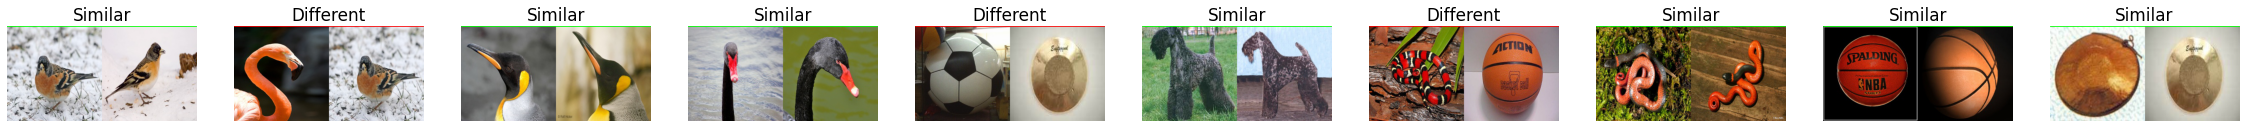

In [1]:
import sys
sys.path.append('../../utility')
import util
import numpy as np

folders = util.load_images('../../data/dataset_pairs')
data, labels = util.create_pairs(folders)
data, labels = util.shuffle_data(data, labels)
data_split, labels_split = util.split_data(data, labels)
data_train, data_val, data_test = data_split
labels_train, labels_val, labels_test = labels_split

print('Dataset contains', data.shape[0], 'image pairs')
print('Train contains', data_train.shape[0], 'image pairs')
print('Validation contains', data_val.shape[0], 'image pairs')
print('Test contains', data_test.shape[0], 'image pairs')

util.visualize(data_train, labels_train)

In [2]:
from keras.models import load_model

embedding_extractor = load_model('./binary_cross_entropy_loss_embedding_extractor.h5')

embedding_extractor.summary()

Model: "embedding_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 dense_46 (Dense)            (None, 7, 7, 512)         655872    
                                                                 
 global_average_pooling2d_21  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
Total params: 2,913,856
Trainable params: 655,872
Non-trainable params: 2,257,984
_________________________________________________________________


In [3]:
similarity = util.get_similarity_from_embedding(embedding_extractor, data_test)

Took 6.50 seconds to predict 72 image pairs
Prediction time: 0.09 seconds


Best accuracy: 1.0
binary cross-entropy
- Amount of TP: 36
- Amount of TN: 36
- Amount of FP: 0
- Amount of FN: 0
- AUC score: 1.0
- Accuracy: 1.0
- Recall: 1.0
- Precision: 1.0
- F1: 1.0
- Kappa: 1.0


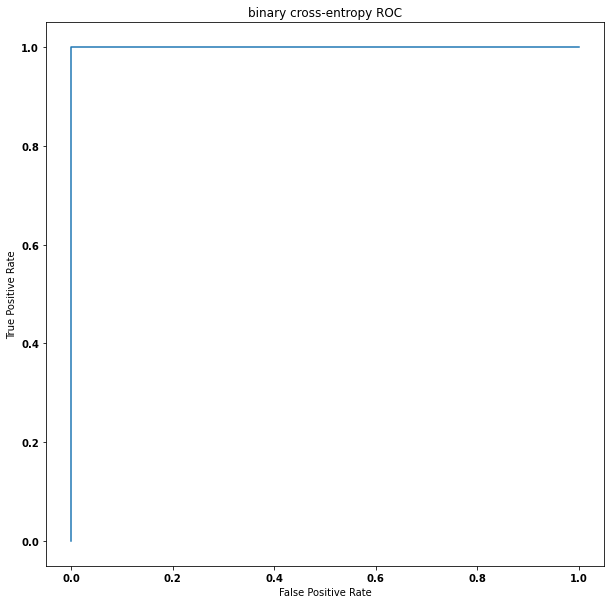

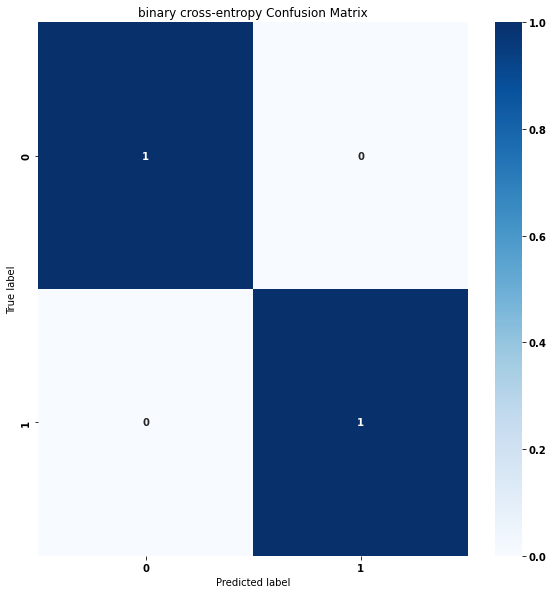

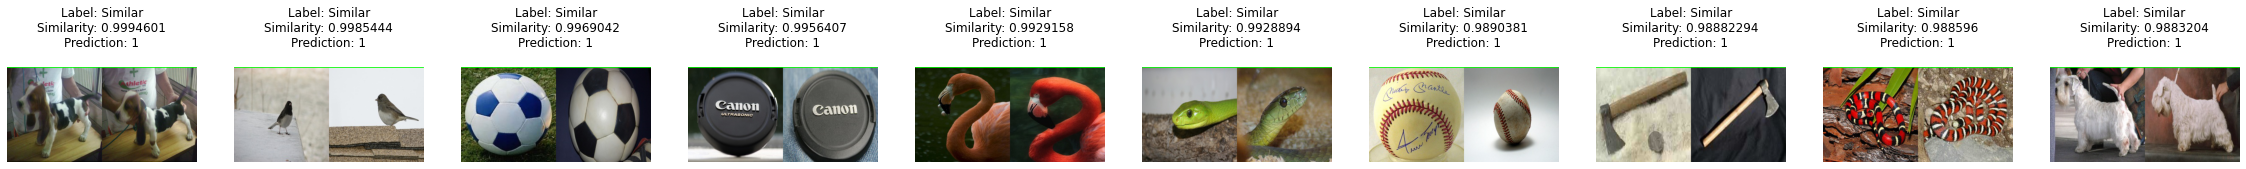

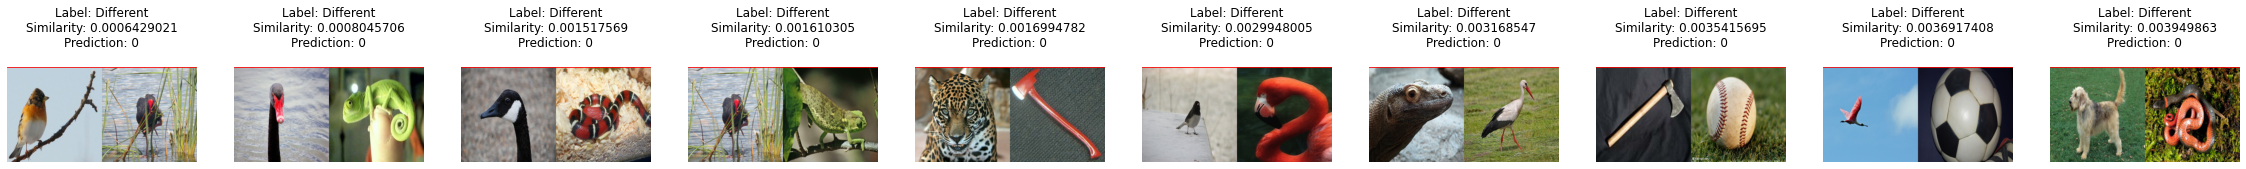

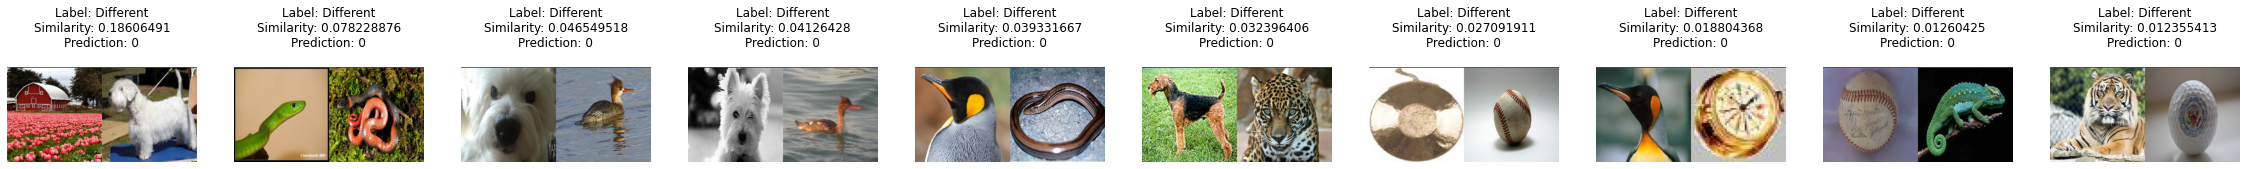

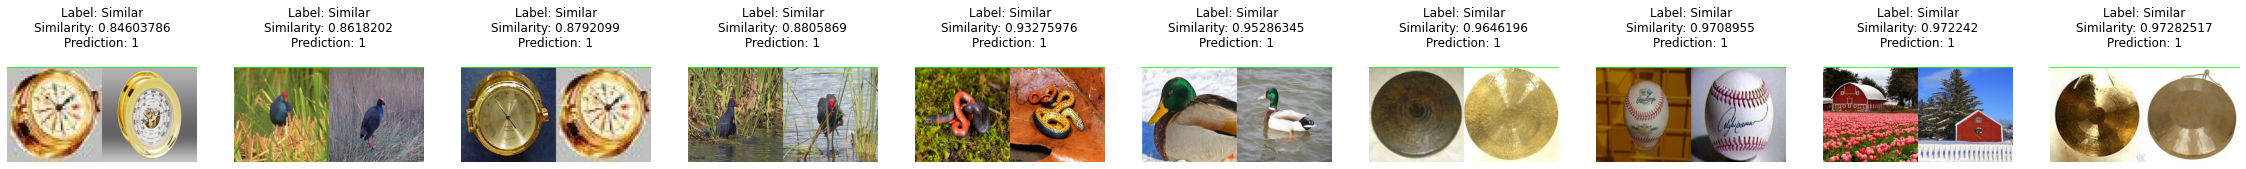

Threshold:  0.19000000000000009


In [6]:
util.evaluate(data=data_test, labels=labels_test, similarity=similarity, name="binary cross-entropy")

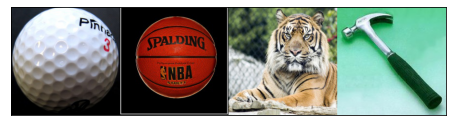

0.0122104185
0.012636857
0.0060098395
0.0045702225
0.0012308547
0.003948901


In [5]:
img1 = data_test[0][0]
img2 = data_test[0][1]
img3 = data_test[1][0]
img4 = data_test[3][1]

import numpy as np

util.visualize_images(img1, img2, img3, img4)

feature1 = embedding_extractor.predict(np.expand_dims(img1, axis=0))
feature2 = embedding_extractor.predict(np.expand_dims(img2, axis=0))
feature3 = embedding_extractor.predict(np.expand_dims(img3, axis=0))
feature4 = embedding_extractor.predict(np.expand_dims(img4, axis=0))

distance1 = util.cosine_similarity(feature1, feature2)
distance2 = util.cosine_similarity(feature1, feature3)
distance3 = util.cosine_similarity(feature1, feature4)
distance4 = util.cosine_similarity(feature2, feature3)
distance5 = util.cosine_similarity(feature2, feature4)
distance6 = util.cosine_similarity(feature3, feature4)

print(distance1)
print(distance2)
print(distance3)
print(distance4)
print(distance5)
print(distance6)